[View in Colaboratory](https://colab.research.google.com/github/raviudal/Jupyter-Notebooks/blob/master/PythonDataScienceHandbook_by_jakevdp_Data_Manipulation_with_Pandas.ipynb)

### [Introducing Pandas Objects](https://jakevdp.github.io/PythonDataScienceHandbook/03.01-introducing-pandas-objects.html)
There are three fundamental Pandas data structures:**Series, DataFrame, and Index**.

In [0]:
import numpy as np
import pandas as pd

In [52]:
# Pandas Series = A Pandas Series is a one-dimensional array of indexed data. 
data = pd.Series([0.25, 0.5, 0.75, 1.0])
print('data.values: ', data.values)
print('data.index : ', data.index)
# We can access series values just like lists using its index
print('data[1]: ',data[1])  # If we want we can do slicing on it also

# We can have alphabetical index also.
data = pd.Series([0.25, 0.5, 0.75, 1.0], index=['a', 'b', 'c', 'd'])
print('\nData series with character indexes:\n{}'.format(data))


## Pandas DataFrame Object
# If a Series is an analog of a one-dimensional array with flexible indices, a DataFrame is an analog of a two-dimensional array with both flexible row 
# indices and flexible column names. Just as you might think of a two-dimensional array as an ordered sequence of aligned one-dimensional columns, 
# you can think of a DataFrame as a sequence of aligned Series objects
area = {'California': 423967, 'Texas': 695662, 'New York': 141297, 'Florida': 170312, 'Illinois': 149995}
population = [9865986,5958568,6366966,966966,99699966]
area = pd.Series(area)

print(pd.DataFrame({'Area':area, 'Pop': population}))







data.values:  [0.25 0.5  0.75 1.  ]
data.index :  RangeIndex(start=0, stop=4, step=1)
data[1]:  0.5

Data series with character indexes:
a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64
              Area       Pop
California  423967   9865986
Florida     170312   5958568
Illinois    149995   6366966
New York    141297    966966
Texas       695662  99699966


[Data Indexing and Selection](https://jakevdp.github.io/PythonDataScienceHandbook/03.02-data-indexing-and-selection.html)


In [53]:
data = pd.Series([0.25, 0.5, 0.75, 1.0], index=['a', 'b', 'c', 'd'])
# Series selection
print('1) \'a\' in data: ', 'a' in data)

# slicing by explicit index
print('2) data[\'a\':\'c\']: Selecting data from a to c\n{}'.format(data['a':'c']))

# slicing by implicit integer index
print('3) Implicit Selecting data from 0 to 2\n{} :'.format(data[0:2]))

# masking  => data[(data > 0.3) & (data < 0.8)]
data[(data > 0.3) & (data < 0.8)]


# Indexers: loc, iloc, and ix
data = pd.Series(['a', 'b', 'c'], index=[1, 3, 5])
# The loc attribute allows indexing and slicing that always references the explicit index.
print('4) data.loc[1] : ',data.loc[1],'\n') 
print('5) data.loc[1:3] :\n{}'.format(data.loc[1:3]))

# The iloc attribute allows indexing and slicing that always references the implicit Python-style index.
print('\nThe implicit Python-style index.')
print('6) data.iloc[1] :', data.iloc[1])

1) 'a' in data:  True
2) data['a':'c']: Selecting data from a to c
a    0.25
b    0.50
c    0.75
dtype: float64
3) Implicit Selecting data from 0 to 2
a    0.25
b    0.50
dtype: float64 :
4) data.loc[1] :  a 

5) data.loc[1:3] :
1    a
3    b
dtype: object

The implicit Python-style index.
6) data.iloc[1] : b


https://jakevdp.github.io/PythonDataScienceHandbook/03.04-missing-values.html

[Combining Datasets: Concat and Append](https://jakevdp.github.io/PythonDataScienceHandbook/03.06-concat-and-append.html)
Here we'll take a look at simple concatenation of Series and DataFrames with the `` pd.concat`` function

In [54]:
def make_df(cols, ind):
    """Quickly make a DataFrame"""
    data = {c: [str(c) + str(i) for i in ind]
            for c in cols}
    return pd.DataFrame(data, ind)

# example DataFrame
print('Example data-frame:\n{}'.format(make_df('ABC', range(3))))

# Create a quick class that allows us to display multiple DataFrames side by side. The code makes use of the special _repr_html_ method, which IPython uses 
# to implement its rich object display.

class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)
    

Example data-frame:
    A   B   C
0  A0  B0  C0
1  A1  B1  C1
2  A2  B2  C2


In [55]:
############## Printing ipython dispat fun is used so you can test all the things one by one by commenting other lines
## Recall: Concatenation of NumPy Arrays

x = [1, 2, 3]
y = [4, 5, 6]
z = [7, 8, 9]
print('1). Concatinating of arrays using numpy.concatenate : {}'.format(np.concatenate([x, y, z])))


## Simple Concatenation with pd.concat
# Method signature can be seen using ? command.
# pd.concat?

# We can concatinate two dataframes to get a consolidated dataframe
df1 = make_df('AB', [1, 2])
df2 = make_df('AB', [3, 4])
display('df1', 'df2', 'pd.concat([df1, df2])')

# By default, the concatenation takes place row-wise within the DataFrame (i.e., axis=0)
df3 = make_df('AB', [0, 1])
df4 = make_df('CD', [0, 1])
display('df3', 'df4', "pd.concat([df3, df4], axis=1)")

## Duplicate indices 
# Pandas have no issues with duplicate indexs, 
x = make_df('AB', [0, 1])
y = make_df('AB', [2, 3])
y.index = x.index  # make duplicate indices!
display('x', 'y', 'pd.concat([x, y])')

# If you'd like to simply verify that the indices in the result of pd.concat() do not overlap, you can specify the verify_integrity flag. With this set to True,
# the concatenation will raise an exception if there are duplicate indices
print('\n')
try:
    pd.concat([x, y], verify_integrity=True)
except ValueError as e:
    print("ValueError:", e)
    

# Sometimes the index itself does not matter, and you would prefer it to simply be ignored. This option can be specified using the ignore_index flag. 
display('x', 'y', 'pd.concat([x, y], ignore_index=True)')

1). Concatinating of arrays using numpy.concatenate : [1 2 3 4 5 6 7 8 9]


ValueError: Indexes have overlapping values: [0, 1]


,A,B
0,A0,B0
1,A1,B1
,A,B
0,A2,B2
1,A3,B3
,A,B
0,A0,B0
1,A1,B1
2,A2,B2
3,A3,B3


In [56]:
# Adding MultiIndex keys
display('x', 'y', "pd.concat([x, y], keys=['x', 'y'])")

x
    A   B
0  A0  B0
1  A1  B1

y
    A   B
0  A2  B2
1  A3  B3

pd.concat([x, y], keys=['x', 'y'])
      A   B
x 0  A0  B0
  1  A1  B1
y 0  A2  B2
  1  A3  B3

In [57]:
# Concatenation with joins
df5 = make_df('ABC', [1, 2])
df6 = make_df('BCD', [3, 4])
display('df5', 'df6', 'pd.concat([df5, df6])')

df5
    A   B   C
1  A1  B1  C1
2  A2  B2  C2

df6
    B   C   D
3  B3  C3  D3
4  B4  C4  D4

pd.concat([df5, df6])
     A   B   C    D
1   A1  B1  C1  NaN
2   A2  B2  C2  NaN
3  NaN  B3  C3   D3
4  NaN  B4  C4   D4

In [58]:
# we can specify type of join we want in the parameter
display('df5', 'df6', "pd.concat([df5, df6], join='inner')")

df5
    A   B   C
1  A1  B1  C1
2  A2  B2  C2

df6
    B   C   D
3  B3  C3  D3
4  B4  C4  D4

pd.concat([df5, df6], join='inner')
    B   C
1  B1  C1
2  B2  C2
3  B3  C3
4  B4  C4

In [59]:
# Another option is to directly specify the index of the remaininig colums using the join_axes argument, which takes a list of index objects. 
# Here we'll specify that the returned columns should be the same as those of the first input:
display('df5', 'df6', "pd.concat([df5, df6], join_axes=[df5.columns])")

,A,B,C
1,A1,B1,C1
2,A2,B2,C2
,B,C,D
3,B3,C3,D3
4,B4,C4,D4
,A,B,C
1,A1,B1,C1
2,A2,B2,C2
3,NaN,B3,C3
4,NaN,B4,C4


In [60]:
# The append() method
# Rather than calling pd.concat([df1, df2]), you can simply call df1.append(df2)
display('df1', 'df2', 'df1.append(df2)')

,A,B
1,A1,B1
2,A2,B2
,A,B
3,A3,B3
4,A4,B4
,A,B
1,A1,B1
2,A2,B2
3,A3,B3
4,A4,B4


### Combining Datasets: Merge and Join

#### Relational Algebra
The behavior implemented in pd.merge() is a subset of what is known as relational algebra, which is a formal set of rules for manipulating relational data, and forms the conceptual foundation of operations available in most databases. The strength of the relational algebra approach is that it proposes several primitive operations, which become the building blocks of more complicated operations on any dataset. With this lexicon of fundamental operations implemented efficiently in a database or other program, a wide range of fairly complicated composite operations can be performed.

Pandas implements several of these fundamental building-blocks in the pd.merge() function and the related join() method of Series and Dataframes. As we will see, these let you efficiently link data from different sources.

In [0]:
## One-to-one joins
#Perhaps the simplest type of merge expresion is the one-to-one join, which is in many ways very similar to the column-wise concatenation
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})
display('df1', 'df2',"pd.merge(df1, df2)")
df3 = pd.merge(df1, df2)

In [62]:
## Many-to-one joins
# Many-to-one joins are joins in which one of the two key columns contains duplicate entries. For the many-to-one case,
# the resulting DataFrame will preserve those duplicate entries as appropriate. 
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
                    'supervisor': ['Carly', 'Guido', 'Steve']})
display('df3', 'df4', 'pd.merge(df3, df4)')

df3
  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014

df4
         group supervisor
0   Accounting      Carly
1  Engineering      Guido
2           HR      Steve

pd.merge(df3, df4)
  employee        group  hire_date supervisor
0      Bob   Accounting       2008      Carly
1     Jake  Engineering       2012      Guido
2     Lisa  Engineering       2004      Guido
3      Sue           HR       2014      Steve

In [63]:
## Many-to-many joins
# Many-to-many joins are a bit confusing conceptually, but are nevertheless well defined. If the key column in both the left and right array contains duplicates,
# then the result is a many-to-many merge. This will be perhaps most clear with a concrete example.

df5 = pd.DataFrame({'group': ['Accounting', 'Accounting',
                              'Engineering', 'Engineering', 'HR', 'HR'],
                    'skills': ['math', 'spreadsheets', 'coding', 'linux',
                               'spreadsheets', 'organization']})
display('df1', 'df5', "pd.merge(df1, df5)")



,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR
,group,skills
0,Accounting,math
1,Accounting,spreadsheets
2,Engineering,coding
3,Engineering,linux
4,HR,spreadsheets


In [64]:
## The on keyword
#Most simply, you can explicitly specify the name of the key column using the on keyword, which takes a column name or a list of column names
display('df1', 'df2', "pd.merge(df1, df2, on='employee')")

df1
  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR

df2
  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014

pd.merge(df1, df2, on='employee')
  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014

In [65]:
## The left_on and right_on keywords
# At times you may wish to merge two datasets with different column names; for example, we may have a dataset in which the employee name is labeled as "name" 
# rather than "employee". In this case, we can use the left_on and right_on keywords to specify the two column names.

df3 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'salary': [70000, 80000, 120000, 90000]})
display('df1', 'df3', 'pd.merge(df1, df3, left_on="employee", right_on="name")',"pd.merge(df1, df3, left_on='employee', right_on='name').drop('name', axis=1)")

# The result has a redundant column that we can drop if desired–for example, by using the drop() method of DataFrames
# pd.merge(df1, df3, left_on="employee", right_on="name").drop('name', axis=1)


df1
  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR

df3
   name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000

pd.merge(df1, df3, left_on="employee", right_on="name")
  employee        group  name  salary
0      Bob   Accounting   Bob   70000
1     Jake  Engineering  Jake   80000
2     Lisa  Engineering  Lisa  120000
3      Sue           HR   Sue   90000

pd.merge(df1, df3, left_on='employee', right_on='name').drop('name', axis=1)
  employee        group  salary
0      Bob   Accounting   70000
1     Jake  Engineering   80000
2     Lisa  Engineering  120000
3      Sue           HR   90000

In [66]:
## The left_index and right_index keywords
# Sometimes, rather than merging on a column, you would instead like to merge on an index. For example, your data might look like this:
df1a = df1.set_index('employee')
df2a = df2.set_index('employee')
display('df1a', 'df2a')

display('df1a', 'df2a',
        "pd.merge(df1a, df2a, left_index=True, right_index=True)")

,group
employee,
Bob,Accounting
Jake,Engineering
Lisa,Engineering
Sue,HR
,hire_date
employee,
Lisa,2004
Bob,2008
Jake,2012


In [67]:
## Specifying Set Arithmetic for Joins
# In all the preceding examples we have glossed over one important consideration in performing a join: the type of set arithmetic used in the join. 
# This comes up when a value appears in one key column but not the other. 
df6 = pd.DataFrame({'name': ['Peter', 'Paul', 'Mary'],
                    'food': ['fish', 'beans', 'bread']},
                   columns=['name', 'food'])
df7 = pd.DataFrame({'name': ['Mary', 'Joseph'],
                    'drink': ['wine', 'beer']},
                   columns=['name', 'drink'])
display('df6', 'df7', 'pd.merge(df6, df7)')

df6
    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread

df7
     name drink
0    Mary  wine
1  Joseph  beer

pd.merge(df6, df7)
   name   food drink
0  Mary  bread  wine

In [68]:
##  Overlapping Column Names: The suffixes Keyword
# Finally, you may end up in a case where your two input DataFrames have conflicting column names.
df8 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank': [1, 2, 3, 4]})
df9 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank': [3, 1, 4, 2]})
display('df8', 'df9', 'pd.merge(df8, df9, on="name")')

df8
   name  rank
0   Bob     1
1  Jake     2
2  Lisa     3
3   Sue     4

df9
   name  rank
0   Bob     3
1  Jake     1
2  Lisa     4
3   Sue     2

pd.merge(df8, df9, on="name")
   name  rank_x  rank_y
0   Bob       1       3
1  Jake       2       1
2  Lisa       3       4
3   Sue       4       2

In [69]:
# Insted of default suffixes, we can specify our own also,
display('df8', 'df9', 'pd.merge(df8, df9, on="name", suffixes=["_L", "_R"])')

df8
   name  rank
0   Bob     1
1  Jake     2
2  Lisa     3
3   Sue     4

df9
   name  rank
0   Bob     3
1  Jake     1
2  Lisa     4
3   Sue     2

pd.merge(df8, df9, on="name", suffixes=["_L", "_R"])
   name  rank_L  rank_R
0   Bob       1       3
1  Jake       2       1
2  Lisa       3       4
3   Sue       4       2

Example practice for join:<br>
https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html#Example:-US-States-Data

###[ Aggregation and Grouping](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html)
An essential piece of analysis of large data is efficient summarization: computing aggregations like ``sum(), mean(), median(), min(), and max()``, in which a single number gives insight into the nature of a potentially large dataset. In this section, we'll explore aggregations in Pandas, from simple operations akin to what we've seen on NumPy arrays, to more sophisticated operations based on the concept of a groupby.

In [70]:
## -------Planets Data---------
import seaborn as sns
planets = sns.load_dataset('planets')
print('Shape of the planets dats set: {}'.format(planets.shape))
print('Head:\n', planets.head())

Shape of the planets dats set: (1035, 6)
Head:
             method  number  orbital_period   mass  distance  year
0  Radial Velocity       1         269.300   7.10     77.40  2006
1  Radial Velocity       1         874.774   2.21     56.95  2008
2  Radial Velocity       1         763.000   2.60     19.84  2011
3  Radial Velocity       1         326.030  19.40    110.62  2007
4  Radial Velocity       1         516.220  10.50    119.47  2009


#### Simple Aggregation in Pandas
The following table summarizes some other built-in Pandas aggregations:

|   Aggregation           |   Description                                        |
|---------------------------------|-----------------------------------------|
|   count()                    |   Total number of items                    |
|   first(), last()            |   First and last item                           |
|   mean(), median()  |   Mean and median                            |
|   min(), max()           |   Minimum and maximum                |
|   std(), var()              |   Standard deviation and variance  |
|   mad()                      |   Mean absolute deviation                |
|   prod()                      |   Product of all items                         |
|   sum()                      |   Sum of all items                               |
These are all methods of DataFrame and Series objects.<BR>
  To go deeper into the data, however, simple aggregates are often not enough. The next level of data summarization is the groupby operation, which allows you to quickly and efficiently compute aggregates on subsets of data


#### GroupBy: Split, Apply, Combine<br>
Simple aggregations can give you a flavor of your dataset, but often we would prefer to aggregate conditionally on some label or index: this is implemented in the so-called groupby operation. The name "``group by``" comes from a command in the SQL database language, but it is perhaps more illuminative to think of it in the terms first coined by Hadley Wickham of Rstats fame: ``split, apply, combine``.

![alt text](https://jakevdp.github.io/PythonDataScienceHandbook/figures/03.08-split-apply-combine.png)<br>
This makes clear what the groupby accomplishes:
 
* The ``split`` step involves breaking up and grouping a DataFrame depending on the value of the specified key.
* The ``apply`` step involves computing some function, usually an aggregate, transformation, or filtering, within the individual groups.
* The ``combine`` step merges the results of these operations into an output array.

As a concrete example, let's take a look at using Pandas for the computation shown in this diagram. We'll start by creating the input DataFrame:

In [71]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data': range(6)}, columns=['key', 'data'])
df

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


In [72]:
# The most basic split-apply-combine operation can be computed with the groupby() method of DataFrames, passing the name of the desired key column:
df.groupby('key')

Notice that what is returned is not a set of DataFrames, but a ``DataFrameGroupBy`` object. This object is where the magic is: you can think of it as a special view of the DataFrame, which is poised to dig into the groups but does no actual computation until the aggregation is applied. This "lazy evaluation" approach means that common aggregates can be implemented very efficiently in a way that is almost transparent to the user.

<br>
To produce a result, we can apply an aggregate to this ``DataFrameGroupBy`` object, which will perform the appropriate apply/combine steps to produce the desired result:

In [73]:
df.groupby('key').sum()

# The sum() method is just one possibility here; you can apply virtually any common Pandas or NumPy aggregation function, 
# as well as virtually any valid DataFrame operation

,data
key,
A,3
B,5
C,7


### The GroupBy object
The GroupBy object is a very flexible abstraction. In many ways, you can simply treat it as if it's a collection of DataFrames, and it does the difficult things under the hood. Let's see some examples using the Planets data.

Perhaps the most important operations made available by a GroupBy are aggregate, filter, transform, and apply. We'll discuss each of these more fully in ``"Aggregate, Filter, Transform, Apply"``, but before that let's introduce some of the other functionality that can be used with the basic GroupBy operation.

#### Column indexing
The GroupBy object supports column indexing in the same way as the DataFrame, and returns a modified GroupBy object. For example:

In [74]:
planets.groupby('method')

In [75]:
planets.groupby('method')['orbital_period']

Here we've selected a particular Series group from the original DataFrame group by reference to its column name. As with the GroupBy object, no computation is done until we call some aggregate on the object:

In [76]:
planets.groupby('method')['orbital_period'].median()

method
Astrometry                         631.180000
Eclipse Timing Variations         4343.500000
Imaging                          27500.000000
Microlensing                      3300.000000
Orbital Brightness Modulation        0.342887
Pulsar Timing                       66.541900
Pulsation Timing Variations       1170.000000
Radial Velocity                    360.200000
Transit                              5.714932
Transit Timing Variations           57.011000
Name: orbital_period, dtype: float64

This gives an idea of the general scale of orbital periods (in days) that each method is sensitive to.

#### Iteration over groups
The GroupBy object supports direct iteration over the groups, returning each group as a Series or DataFrame:

In [77]:
for (method, group) in planets.groupby('method'):
    print("{0:30s} shape={1}".format(method, group.shape))

Astrometry                     shape=(2, 6)
Eclipse Timing Variations      shape=(9, 6)
Imaging                        shape=(38, 6)
Microlensing                   shape=(23, 6)
Orbital Brightness Modulation  shape=(3, 6)
Pulsar Timing                  shape=(5, 6)
Pulsation Timing Variations    shape=(1, 6)
Radial Velocity                shape=(553, 6)
Transit                        shape=(397, 6)
Transit Timing Variations      shape=(4, 6)


This can be useful for doing certain things manually, though it is often much faster to use the built-in ``apply`` functionality, which we will discuss momentarily.

#### Dispatch methods
Through some Python class magic, any method not explicitly implemented by the ``GroupBy`` object will be passed through and called on the ``groups``, whether they are ``DataFrame`` or ``Series`` objects. For example, you can use the `` describe()`` method of DataFrames to perform a set of aggregations that describe each group in the data:

In [78]:
planets.groupby('method')['year'].describe().unstack()

       method                       
count  Astrometry                          2.000000
       Eclipse Timing Variations           9.000000
       Imaging                            38.000000
       Microlensing                       23.000000
       Orbital Brightness Modulation       3.000000
       Pulsar Timing                       5.000000
       Pulsation Timing Variations         1.000000
       Radial Velocity                   553.000000
       Transit                           397.000000
       Transit Timing Variations           4.000000
mean   Astrometry                       2011.500000
       Eclipse Timing Variations        2010.000000
       Imaging                          2009.131579
       Microlensing                     2009.782609
       Orbital Brightness Modulation    2011.666667
       Pulsar Timing                    1998.400000
       Pulsation Timing Variations      2007.000000
       Radial Velocity                  2007.518987
       Transit             

Looking at this table helps us to better understand the data: for example, the vast majority of planets have been discovered by the Radial Velocity and Transit methods, though the latter only became common (due to new, more accurate telescopes) in the last decade. The newest methods seem to be Transit Timing Variation and Orbital Brightness Modulation, which were not used to discover a new planet until 2011.

This is just one example of the utility of dispatch methods. Notice that they are applied to each individual group, and the results are then combined within GroupBy and returned. Again, any valid ``DataFrame``/``Series`` method can be used on the corresponding GroupBy object, which allows for some very flexible and powerful operations!

#### Aggregate, filter, transform, apply
The preceding discussion focused on aggregation for the combine operation, but there are more options available. In particular, GroupBy objects have ``aggregate(),  filter(), transform(), and apply()`` methods that efficiently implement a variety of useful operations before combining the grouped data.

For the purpose of the following subsections, we'll use this DataFrame:

In [79]:
rng = np.random.RandomState(0)
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data1': range(6),
                   'data2': rng.randint(0, 10, 6)},
                   columns = ['key', 'data1', 'data2'])
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


#### Aggregation
We're now familiar with ``GroupBy`` aggregations with ``sum()``,`` median()``, and the like, but the ``aggregate()`` method allows for even more flexibility. It can take a string, a function, or a list thereof, and compute all the aggregates at once. Here is a quick example combining all these:

In [80]:
df.groupby('key').aggregate(['min', np.median, max])

data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     3    4.0   5
B       1    2.5   4     0    3.5   7
C       2    3.5   5     3    6.0   9

Another useful pattern is to pass a dictionary mapping column names to operations to be applied on that column:

In [81]:
df.groupby('key').aggregate({'data1': 'min',
                             'data2': 'max'})

,data1,data2
key,,
A,0,5
B,1,7
C,2,9


#### Filtering
A filtering operation allows you to drop data based on the group properties. For example, we might want to keep all groups in which the standard deviation is larger than some critical value:

In [82]:
def filter_func(x):
    return x['data2'].std() > 4

display('df', "df.groupby('key').std()", "df.groupby('key').filter(filter_func)")

df
  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9

df.groupby('key').std()
       data1     data2
key                   
A    2.12132  1.414214
B    2.12132  4.949747
C    2.12132  4.242641

df.groupby('key').filter(filter_func)
  key  data1  data2
1   B      1      0
2   C      2      3
4   B      4      7
5   C      5      9

The filter function should return a Boolean value specifying whether the group passes the filtering. Here because group A does not have a standard deviation greater than 4, it is dropped from the result.

#### Transformation
While aggregation must return a reduced version of the data, transformation can return some transformed version of the full data to recombine. For such a transformation, the output is the same shape as the input. A common example is to center the data by subtracting the group-wise mean:

In [83]:
df.groupby('key').transform(lambda x: x - x.mean())

# Trnasform do some action on all the column and rows.

,data1,data2
0,-1.5,1.0
1,-1.5,-3.5
2,-1.5,-3.0
3,1.5,-1.0
4,1.5,3.5
5,1.5,3.0


#### The apply() method
The ``apply()`` method lets you apply an arbitrary function to the group results. The function should take a ``DataFrame``, and return either a Pandas object (``e.g., DataFrame, Series``) or a scalar; the combine operation will be tailored to the type of output returned.

For example, here is an ``apply()`` that normalizes the first column by the ``sum`` of the second:

In [84]:
def norm_by_data2(x):
    # x is a DataFrame of group values
    x['data1'] /= x['data2'].sum()
    return x

display('df', "df.groupby('key').apply(norm_by_data2)")

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9
,key,data1,data2
0,A,0.000000,5
1,B,0.142857,0
2,C,0.166667,3


apply() within a GroupBy is quite flexible: the only criterion is that the function takes a DataFrame and returns a Pandas object or scalar; what you do in the middle is up to you!

### Specifying the split key

In the simple examples presented before, we split the DataFrame on a single column name. This is just one of many options by which the groups can be defined, and we'll go through some other options for group specification here.
#### A list, array, series, or index providing the grouping keys

The key can be any series or list with a length matching that of the DataFrame. For example:


In [85]:
L = [0, 1, 0, 1, 2, 0]
display('df', 'df.groupby(L).sum()')

df
  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9

df.groupby(L).sum()
   data1  data2
0      7     17
1      4      3
2      4      7

In [86]:
# There's another, more verbose way of accomplishing the df.groupby('key') from before:

display('df', "df.groupby(df['key']).sum()")

df
  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9

df.groupby(df['key']).sum()
     data1  data2
key              
A        3      8
B        5      7
C        7     12

####  A dictionary or series mapping index to group

Another method is to provide a dictionary that maps index values to the group keys:


In [87]:
df2 = df.set_index('key')
mapping = {'A': 'vowel', 'B': 'consonant', 'C': 'consonant'}
display('df2', 'df2.groupby(mapping).sum()')

,data1,data2
key,,
A,0,5
B,1,0
C,2,3
A,3,3
B,4,7
C,5,9
,data1,data2
consonant,12,19
vowel,3,8


In [88]:
decade = 10 * (planets['year'] // 10)
decade = decade.astype(str) + 's'
decade.name = 'decade'
planets.groupby(['method', decade])['number'].sum().unstack().fillna(0)

decade,1980s,1990s,2000s,2010s
method,,,,
Astrometry,0.0,0.0,0.0,2.0
Eclipse Timing Variations,0.0,0.0,5.0,10.0
Imaging,0.0,0.0,29.0,21.0
Microlensing,0.0,0.0,12.0,15.0
Orbital Brightness Modulation,0.0,0.0,0.0,5.0
Pulsar Timing,0.0,9.0,1.0,1.0
Pulsation Timing Variations,0.0,0.0,1.0,0.0
Radial Velocity,1.0,52.0,475.0,424.0
Transit,0.0,0.0,64.0,712.0


In [0]:
# planets

In [90]:
yr= (10 * (planets.year // 10)).astype(str) + 's'
# yr.head()
planets.groupby(['method',yr ])['number'].sum().unstack().fillna(0)

year,1980s,1990s,2000s,2010s
method,,,,
Astrometry,0.0,0.0,0.0,2.0
Eclipse Timing Variations,0.0,0.0,5.0,10.0
Imaging,0.0,0.0,29.0,21.0
Microlensing,0.0,0.0,12.0,15.0
Orbital Brightness Modulation,0.0,0.0,0.0,5.0
Pulsar Timing,0.0,9.0,1.0,1.0
Pulsation Timing Variations,0.0,0.0,1.0,0.0
Radial Velocity,1.0,52.0,475.0,424.0
Transit,0.0,0.0,64.0,712.0


**Above example is very important, **
Here we are taking a series object (year) and converting the values of that object into decade and then grouping based in that.<br>
Here trick is that, the series object remembers the index and do grouping based on that.


### [Pivot Tables](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html)
A pivot table is a similar operation that is commonly seen in spreadsheets and other programs that operate on tabular data. The pivot table takes simple column-wise data as input, and groups the entries into a two-dimensional table that provides a multidimensional summarization of the data. The difference between pivot tables and GroupBy can sometimes cause confusion; it helps me to think of pivot tables as essentially a multidimensional version of GroupBy aggregation. That is, you split-apply-combine, but both the split and the combine happen across not a one-dimensional index, but across a two-dimensional grid.

#### Motivating Pivot Tables
For the examples in this section, we'll use the database of passengers on the Titanic

In [0]:
import seaborn as sns
titanic = sns.load_dataset('titanic')

#### Pivot Tables by Hand
To start learning more about this data, we might begin by grouping according to gender, survival status, or some combination thereof. If you have read the previous section, you might be tempted to apply a GroupBy operation–for example, let's look at survival rate by gender:

In [92]:
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


This immediately gives us some insight: overall, three of every four females on board survived, while only one in five males survived!

This is useful, but we might like to go one step deeper and look at survival by both sex and, say, class. Using the vocabulary of GroupBy, we might proceed using something like this: we group by class and gender, select survival, apply a mean aggregate, combine the resulting groups, and then unstack the hierarchical index to reveal the hidden multidimensionality. In code:

In [93]:
titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


This gives us a better idea of how both gender and class affected survival, but the code is starting to look a bit garbled. While each step of this pipeline makes sense in light of the tools we've previously discussed, the long string of code is not particularly easy to read or use. This two-dimensional GroupBy is common enough that Pandas includes a convenience routine, pivot_table, which succinctly handles this type of multi-dimensional aggregation.

#### Pivot Table Syntax
Here is the equivalent to the preceding operation using the pivot_table method of DataFrames:

In [94]:
titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


#### Multi-level pivot tables
Just as in the GroupBy, the grouping in pivot tables can be specified with multiple levels, and via a number of options. For example, we might be interested in looking at age as a third dimension. We'll bin the age using the pd.cut function:

In [95]:
age = pd.cut(titanic['age'], [0, 18, 80])
titanic.pivot_table('survived', ['sex', age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

We can apply the same strategy when working with the columns as well; let's add info on the fare paid using pd.qcut to automatically compute quantiles:

In [96]:
fare = pd.qcut(titanic['fare'], 2)
titanic.pivot_table('survived', ['sex', age], [fare, 'class'])

fare            (-0.001, 14.454]                     (14.454, 512.329]  \
class                      First    Second     Third             First   
sex    age                                                               
female (0, 18]               NaN  1.000000  0.714286          0.909091   
       (18, 80]              NaN  0.880000  0.444444          0.972973   
male   (0, 18]               NaN  0.000000  0.260870          0.800000   
       (18, 80]              0.0  0.098039  0.125000          0.391304   

fare                                 
class              Second     Third  
sex    age                           
female (0, 18]   1.000000  0.318182  
       (18, 80]  0.914286  0.391304  
male   (0, 18]   0.818182  0.178571  
       (18, 80]  0.030303  0.192308

#### Additional pivot table options
The aggfunc keyword controls what type of aggregation is applied, which is a mean by default. As in the GroupBy, the aggregation specification can be a string representing one of several common choices (e.g., 'sum', 'mean', 'count', 'min', 'max', etc.) or a function that implements an aggregation (e.g., np.sum(), min(), sum(), etc.). Additionally, it can be specified as a dictionary mapping a column to any of the above desired options:

In [97]:
titanic.pivot_table(index='sex', columns='class',
                    aggfunc={'survived':sum, 'fare':'mean'})

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

Notice also here that we've omitted the values keyword; when specifying a mapping for aggfunc, this is determined automatically.

At times it's useful to compute totals along each grouping. This can be done via the margins keyword:

In [98]:
titanic.pivot_table('survived', index='sex', columns='class', margins=True)

class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


Here this automatically gives us information about the class-agnostic survival rate by gender, the gender-agnostic survival rate by class, and the overall survival rate of 38%. The margin label can be specified with the margins_name keyword, which defaults to "All".

#### Example: Birthrate Data
As a more interesting example, let's take a look at the freely available data on births in the United States, provided by the Centers for Disease Control (CDC). This data can be found at https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv 

In [100]:
births = pd.read_csv('https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv')
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


We can start to understand this data a bit more by using a pivot table. Let's add a decade column, and take a look at male and female births as a function of decade:

In [101]:
births['decade'] = 10 * (births['year'] // 10)
births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


We immediately see that male births outnumber female births in every decade. To see this trend a bit more clearly, we can use the built-in plotting tools in Pandas to visualize the total number of births by year (see Introduction to Matplotlib for a discussion of plotting with Matplotlib):

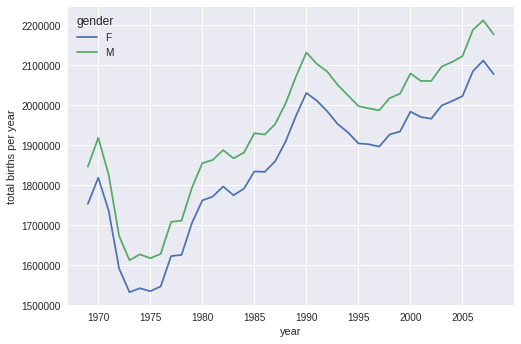

In [102]:
%matplotlib inline
import matplotlib.pyplot as plt
sns.set()  # use Seaborn styles
births.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot()
plt.ylabel('total births per year');

### [Vectorized String Operations](https://jakevdp.github.io/PythonDataScienceHandbook/03.10-working-with-strings.html)
One strength of Python is its relative ease in handling and manipulating string data. Pandas builds on this and provides a comprehensive set of vectorized string operations that become an essential piece of the type of munging required when working with (read: cleaning up) real-world data. In this section, we'll walk through some of the Pandas string operations, and then take a look at using them to partially clean up a very messy dataset of recipes collected from the Internet.

#### Tables of Pandas String Methods
If you have a good understanding of string manipulation in Python, most of Pandas string syntax is intuitive enough that it's probably sufficient to just list a table of available methods; we will start with that here, before diving deeper into a few of the subtleties. The examples in this section use the following series of names:

#### Methods similar to Python string methods
Nearly all Python's built-in string methods are mirrored by a Pandas vectorized string method. Here is a list of Pandas str methods that mirror Python string methods:


    len()	lower()	translate()	islower()
    ljust()	upper()	startswith()	isupper()
    rjust()	find()	endswith()	isnumeric()
    center()	rfind()	isalnum()	isdecimal()
    zfill()	index()	isalpha()	split()
    strip()	rindex()	isdigit()	rsplit()
    rstrip()	capitalize()	isspace()	partition()
    lstrip()	swapcase()	istitle()	rpartition()
 
Notice that these have various return values. Some, like lower(), return a series of strings:

In [116]:
monte = pd.Series(['Graham Chapman', 'John Cleese', 'Terry Gilliam',
                   'Eric Idle', 'Terry Jones', 'Michael Palin'])
monte

0    Graham Chapman
1       John Cleese
2     Terry Gilliam
3         Eric Idle
4       Terry Jones
5     Michael Palin
dtype: object

In [115]:
monte.str.lower()

0    graham chapman
1       john cleese
2     terry gilliam
3         eric idle
4       terry jones
5     michael palin
dtype: object

In [117]:
# But some others return numbers:

monte.str.len()

0    14
1    11
2    13
3     9
4    11
5    13
dtype: int64

In [118]:
# Or Boolean values:

monte.str.startswith('T')

0    False
1    False
2     True
3    False
4     True
5    False
dtype: bool

In [119]:
# Still others return lists or other compound values for each element:

monte.str.split()

0    [Graham, Chapman]
1       [John, Cleese]
2     [Terry, Gilliam]
3         [Eric, Idle]
4       [Terry, Jones]
5     [Michael, Palin]
dtype: object

#### Methods using regular expressions
In addition, there are several methods that accept regular expressions to examine the content of each string element, and follow some of the API conventions of Python's built-in re module:

    Method	Description
    match()	Call re.match() on each element, returning a boolean.
    extract()	Call re.match() on each element, returning matched groups as strings.
    findall()	Call re.findall() on each element
    replace()	Replace occurrences of pattern with some other string
    contains()	Call re.search() on each element, returning a boolean
    count()	Count occurrences of pattern
    split()	Equivalent to str.split(), but accepts regexps
    rsplit()	Equivalent to str.rsplit(), but accepts regexps
    
With these, you can do a wide range of interesting operations. For example, we can extract the first name from each by asking for a contiguous group of characters at the beginning of each element:

In [120]:
monte.str.extract('([A-Za-z]+)', expand=False)

0     Graham
1       John
2      Terry
3       Eric
4      Terry
5    Michael
dtype: object

Or we can do something more complicated, like finding all names that start and end with a consonant, making use of the ``start-of-string`` (^) and ``end-of-string`` ($) regular expression characters:

In [0]:
monte.str.findall(r'^[^AEIOU].*[^aeiou]$')

The ability to concisely apply regular expressions across Series or Dataframe entries opens up many possibilities for analysis and cleaning of data.

#### Miscellaneous methods
Finally, there are some miscellaneous methods that enable other convenient operations:

    Method	Description
    get()	Index each element
    slice()	Slice each element
    slice_replace()	Replace slice in each element with passed value
    cat()	Concatenate strings
    repeat()	Repeat values
    normalize()	Return Unicode form of string
    pad()	Add whitespace to left, right, or both sides of strings
    wrap()	Split long strings into lines with length less than a given width
    join()	Join strings in each element of the Series with passed separator
    get_dummies()	extract dummy variables as a dataframe

#### Vectorized item access and slicing
The get() and slice() operations, in particular, enable vectorized element access from each array. For example, we can get a slice of the first three characters of each array using str.slice(0, 3). Note that this behavior is also available through Python's normal indexing syntax–for example, df.str.slice(0, 3) is equivalent to df.str[0:3]:


In [121]:
monte.str[0:3]

0    Gra
1    Joh
2    Ter
3    Eri
4    Ter
5    Mic
dtype: object

Indexing via df.str.get(i) and df.str[i] is likewise similar.

These get() and slice() methods also let you access elements of arrays returned by split(). For example, to extract the last name of each entry, we can combine split() and get():

In [122]:
monte.str.split().str.get(-1)

0    Chapman
1     Cleese
2    Gilliam
3       Idle
4      Jones
5      Palin
dtype: object

#### Indicator variables
Another method that requires a bit of extra explanation is the get_dummies() method. This is useful when your data has a column containing some sort of coded indicator. For example, we might have a dataset that contains information in the form of codes, such as A="born in America," B="born in the United Kingdom," C="likes cheese," D="likes spam":

In [124]:
full_monte = pd.DataFrame({'name': monte,
                           'info': ['B|C|D', 'B|D', 'A|C',
                                    'B|D', 'B|C', 'B|C|D']})
full_monte

,info,name
0,B|C|D,Graham Chapman
1,B|D,John Cleese
2,A|C,Terry Gilliam
3,B|D,Eric Idle
4,B|C,Terry Jones
5,B|C|D,Michael Palin


The get_dummies() routine lets you quickly split-out these indicator variables into a DataFrame:

In [125]:
full_monte['info'].str.get_dummies('|')

,A,B,C,D
0,0,1,1,1
1,0,1,0,1
2,1,0,1,0
3,0,1,0,1
4,0,1,1,0
5,0,1,1,1


With these operations as building blocks, you can construct an endless range of string processing procedures when cleaning your data.

We won't dive further into these methods here, but I encourage you to read through "[Working with Text Data](http://pandas.pydata.org/pandas-docs/stable/text.html)" in the Pandas online documentation, or to refer to the resources listed in [Further Resources](https://jakevdp.github.io/PythonDataScienceHandbook/03.13-further-resources.html).

### [Working with Time Series](https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html)
